In [194]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

import gym
import gym.wrappers

from irp.envs.redesign.trus_env import TrusEnv
from irp.callbacks import (
    LogNStepsCallback, EvalCallback, ActionDiversityCallback, LogDissimilarityCallback
)
from irp.wrappers import Discretize
from irp.q import Q
from irp import ROOT_DIR, utils

In [195]:
model_folder = 'redesign'
model_id = 'b=(28, 28, 28),mo=27,er=0.05,lr=0.1,g=0.6,ef=0.5,mn=10,mt=100_5'

In [196]:
train_path = 'case10_11.png'
test_path = 'case10_10.png'

(train_x, train_y), (test_x, test_y) = utils.make_sample_label(train_path, test_path)

max_unimproved_steps = 10
max_timesteps = 100
bins = (28, 28, 28)
max_objects = bins[0] - 1

env = TrusEnv(
    train_x, train_y, num_thresholds=15, max_unimproved_steps=max_unimproved_steps
)
env = Discretize(
    env,
    lows={'area': 0.0, 'compactness': 0.0, 'objects': 0.0},
    highs={'area': 1.0, 'compactness': 1.0, 'objects': max_objects},
    bins=bins
)
env = gym.wrappers.TimeLimit(env, max_timesteps)

eval_env = TrusEnv(
    test_x, test_y, num_thresholds=15, max_unimproved_steps=max_unimproved_steps
)
eval_env = Discretize(
    eval_env,
    lows={'area': 0.0, 'compactness': 0.0, 'objects': 0.0},
    highs={'area': 1.0, 'compactness': 1.0, 'objects': max_objects},
    bins=bins
)
eval_env = gym.wrappers.TimeLimit(eval_env, max_timesteps)

In [197]:
# Create the path to the model
model_path = f'../irp/results/{model_folder}/model_{model_id}'
# Load the model
model = Q.load(model_path, env)

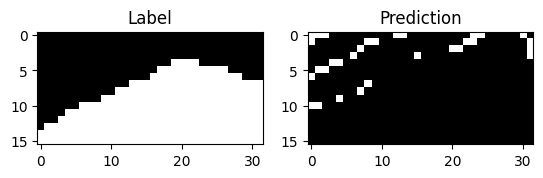

In [199]:
# Reset the environment and show a rendering of it
s = env.reset(); env.render()

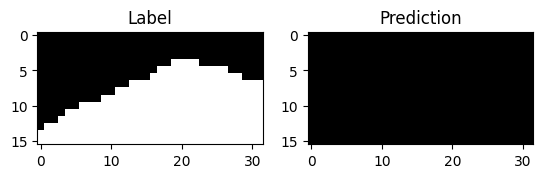

0.5234375


In [213]:
a = model.predict(s, deterministic=True)
sp, r, d, i = env.step(a)
env.render()

print(env.old_dissim)

if d:
    print('Done')
    sp = env.reset()

s = sp

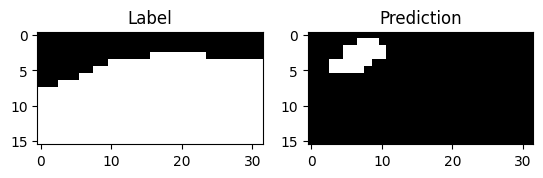

(0.9677734375, 0.5700904855453202, 1) (27, 15, 1)


In [214]:
# Reset the environment and show a rendering of it
s = eval_env.reset(); eval_env.render()
print(eval_env.state, utils.discrete(eval_env.state, eval_env.env._state_bins))

In [215]:
eval_env.state, utils.discrete(eval_env.state, eval_env.env._state_bins)

((0.9677734375, 0.5700904855453202, 1), (27, 15, 1))

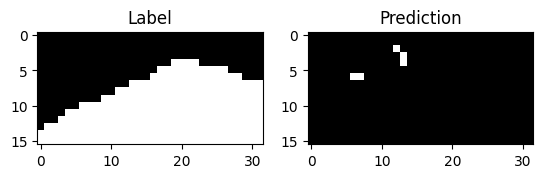

0.533203125


In [149]:
a = model.predict(s, deterministic=True)
sp, r, d, i = eval_env.step(a)
eval_env.render()

print(eval_env.old_dissim)

if d:
    print('Done')
    sp = eval_env.reset()

s = sp

In [150]:
model.policy.q_table[0, 0]

array([1.71846482, 0.63357926, 1.92731311, 1.37004672, 1.92938266])